# Indeksacja. Prosta klasyfikacja obiektów.

## Cel ćwiczenia
- zapoznanie z dwuprzebiegowym algorytmem indeksacji (ang. *connected component labelling*),
- zapoznanie z prostą klasyfikacją obiektów z wykorzystaniem współczynników kształtu,
- zadanie domowe: zmodyfikowana indeksacja dwuprzebiegowa i indeksacja jednoprzebiegowa.

## Indeksacja

Większość dotychczas poznanych i wykorzystywanych algorytmów przetwarzania obrazu wykonywała operacje na całym obrazie (lub co najwyżej dokonywany był podział obiekt/obiekty - tło; przykładem są różne metody segmentacji).
Patrząc na poniższy rysunek, człowiek widzi dwa kwadraty.

![Dwa kwadraty, obraz binarny](https://raw.githubusercontent.com/vision-agh/poc_sw/master/13_CCL/2objects.png)

Dla automatycznego systemu analizy i rozpoznawania obrazów przejście od etapu obiekty/tło do wyróżnienia dwóch kwadratów nie jest takie oczywiste i wymaga zastosowania jakiejś formy indeksacji - czyli przypisania każdemu z pikseli uznanych za należące do obiektów (tu białych) jakieś etykiety (w naszym przypadku będą to dwie etykiety, ew. dodatkowa oznaczająca tło).

W tej części ćwiczenia zaprezentowany zostanie tzw. **dwuprzebiegowy algorytm indeksacji** (ang. *two-pass connected component labelling*).
Jego nazwa związana jest z koniecznością wykonania dwukrotnego odwiedzenia każdego z pikseli obrazu (dwie pętle/iteracje po obrazie).
Istnieją również tzw. jednoprzebiegowe algorytmy indeksacji.

## Opis algorytmu

- Na wejściu mamy obraz po binaryzacji - zakładamy, że piksele białe ('1', '255') należą do obiektów, a tło jest czarne.

- W pierwszej iteracji obraz analizujemy linia po linii, od lewej do prawej, aż do napotkania pierwszego piksela o wartości różnej od '0'.
  W tej sytuacji dokonujemy analizy otoczenia piksela:

  ![Dwa kwadraty, obraz binarny](https://raw.githubusercontent.com/vision-agh/poc_sw/master/13_CCL/cclContext.png)

  Oznaczenia: **X** - rozważany piksel, natomiast **A, B, C, D** - sąsiedzi z otoczenia.

  Uwaga: w przykładzie pokazano tzw. _sąsiedztwo 8-elementowe_.
  Niekiedy stosuje się również wersję 4-elementową (w praktyce bardzo rzadko).
  Wtedy analizie podlegałyby tylko piksele **B** i **D**.

- Możliwe są następujące przypadki dla otoczenia __A, B, C, D__:
    - wszystkie należą do tła (__A, B, C, D == 0__).
      Wtedy znaleziony piksel __X__ należy do nowego obiektu - nadajemy mu zatem etykietę __X = L+1__, przy czym przez __L__ rozumiemy poprzednią etykietę.
	  Uwaga - przed uruchomieniem algorytmu __L__ należy zainicjować wartością  '1'.
    - jeden lub więcej pikseli ma przypisaną aktualną etykietę **L**.
	  Wtedy rozważanemu pikselowi przypisujemy również tę etykietę, czyli **X = L**.
    - w otoczeniu występują piksele o różnych etykietach, np. *L1* i *L2*.
	  Wtedy przyjmuje się zasadę, że rozważanemu pikselowi **X** przypisuje się mniejszą z tych wartości (**X = min(**_L1_, _L2_ **)**).

## Implementacja

- Wczytaj obraz *ccl1.png* i wyświetl go.
  Po krótkiej analizie można zauważyć, że występuje na nim 7 odrębnych obiektów. Ich "wykrycie" będzie naszym celem.

- Na podstawie opisu algorytmu podanego wcześniej zaimplementuj tzw. pierwszą fazę indeksacji (ang. _first pass_):
    - uwaga ogólna - algorytm jest dość prosty i łatwy w implementacji,
    - obliczenia powinny odbywać się w pętlach `for` - iteracja po całym obrazku.
      Warto pominąć pierwszy wiersz oraz pierwszą i ostatnią kolumnę, aby  wyeliminować problem z brakiem kontekstu (można np. założyć, że pikseli brzegowych nie ma, bo wcześniej wykonane zostało morfologiczne czyszczenie brzegu),
    - dla przypomnienia, iteracja po macierzy w Python: pętla zewnętrzna - wiersze, pętla wewnętrzna - kolumny, tj. pierwsza współrzędna to wiersz, a druga to kolumna,
    - rozmiar obrazka można odczytać np. poleceniem: `yy, xx = img.shape`.
      Przy takim przypisaniu `yy` oznacza liczbę wierszy (wysokość obrazka), a `xx` liczbę kolumn (szerokość obrazka),
    - działania podejmujemy tylko w przypadku, gdy aktualnie analizowany piksel ma wartość różną od zera (gdy należy do obiektu),
    - najtrudniejszym elementem jest analiza otoczenia piksela i stwierdzenie, z którym z opisywanych powyżej przypadków mamy do czynienia.
      Problem można rozwiązać jakkolwiek (byleby dobrze), natomiast poniżej prezentowana jest jedna z możliwości,
    - na początku tworzymy listę pikseli, które stanowią otoczenie piksela X (A, B, C, D), np. `neighbours = [img[j - 1, i - 1], ... ]`,
    - następnie sprawdzamy, czy nie występuje 1. przypadek - czyli czy suma sąsiadów nie wynosi 0 -  `neigh_sum = np.sum(neighbours)`, a jeżeli tak, to `X = L` oraz `L += 1`.
      Uwaga, proszę nie zapomnieć zainicjalizować etykiety `L` wartością 1,
    - jeżeli `neigh_sum > 0`, mamy do czynienia z przypadkiem 2. lub 3.
      Eliminujemy zerowe elementy z listy sąsiadów (`neighbours = list(filter(lambda x: x != 0, neighbours))`), a następnie znajdujemy minimum i maksimum nowej listy `neighbours` (funkcje `min` i `max` z modułu _numpy_),
    - z przypadkiem nr 2 będziemy mieli do czynienia, gdy *minimum == maksimum*.
      Wtedy jako etykietę przypisujemy `X = minimum (X = maksimum)`.
      Gdy *minimum != maksimum*, mamy przypadek nr 3.
      Wtedy etykieta `X = minimum` - taką przyjmujemy konwencję,
    - uwaga 1 - algorytm operuje (czyta punkty z otoczenia i zapisuje kolejne indeksy _L_) na tym samym obrazie wejściowym,
    - uwaga 2 - przed implementacją metody obsługi konfliktów, przypadki 2. i 3. działają tak samo, ale dla potrzeb dalszych kroków należy je rozróżnić.

- Wykonaj indeksację obrazu za pomocą zaimplementowanego algorytmu.
  Jeżeli wszystko zostało poprawnie napisane, to wynik powinien wyglądać mniej więcej tak, jak na poniższym rysunku. Takie porównanie stanowić będzie pierwszy test poprawności implementacji algorytmu.

  ![Wynik pierwszewgo etapu indekscacji](https://raw.githubusercontent.com/vision-agh/poc_sw/master/13_CCL/ccl1Result.png)




In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import requests

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/13_CCL/'
fileNames = ["ccl1.png", "shapes.png", "shapesReal.png"]

for fileName in fileNames:
    if not os.path.exists(fileName):
        r = requests.get(url + fileName, allow_redirects=True)
        open(fileName, 'wb').write(r.content)

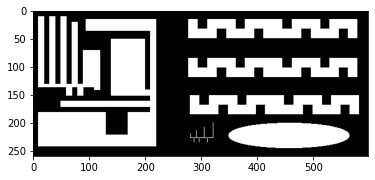

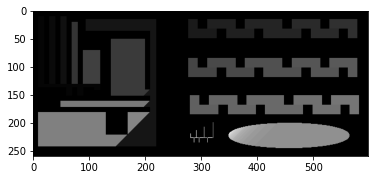

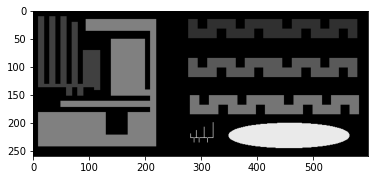

In [ ]:
# Implementacja pierwszego kroku indeksacji

(-0.5, 597.5, 258.5, -0.5)

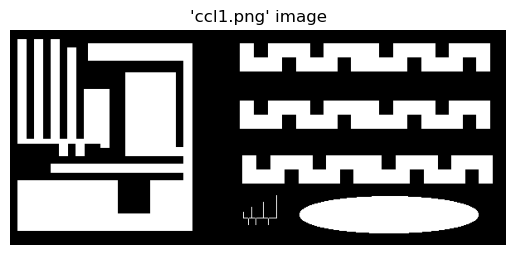

In [2]:
# wczytanie obrazu
ccl1 = cv2.imread('ccl1.png', cv2.IMREAD_GRAYSCALE)

# wyświetlmy wczytany obraz
plt.imshow(ccl1, 'gray')
plt.title("'ccl1.png' image")
plt.axis('off')

In [3]:
# implementacja pierwszej fazy indeksacji
def first_pass(image, resolve_conflict=lambda p, q: None):
    # wymiary obrazu
    H, W = image.shape

    # numer etykiety
    L = 1

    for y in range(1, H):
        for x in range(1, W-1):
            if image[y, x] != 0:
                # otoczenie piksela
                neighbours = [
                    image[y-1, x-1],
                    image[y-1, x],
                    image[y-1, x+1],
                    image[y, x-1]
                ]

                neigh_sum = np.sum(neighbours)

                if neigh_sum == 0: # pierwszy przypadek
                    image[y, x] = L
                    L += 1
                else:
                    neighbours = list(filter(lambda x: x != 0, neighbours))
                    L_min = np.min(neighbours)
                    L_max = np.max(neighbours)

                    if L_min == L_max: # przypadek drugi
                        image[y, x] = L_min
                    else: # przypadek trzeci
                        resolve_conflict(L_min, L_max)
                        image[y, x] = L_min

(-0.5, 597.5, 258.5, -0.5)

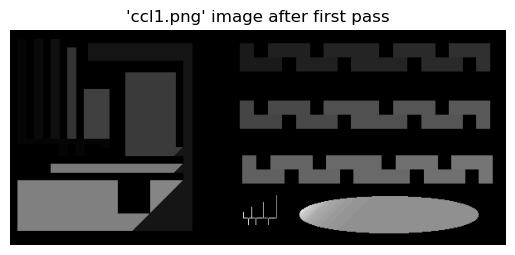

In [4]:
# wykonanie pierwszej fazy indeksacji
first_pass(ccl1)

# wyświetlmy obraz po pierwszym przejściu
plt.imshow(ccl1, 'gray')
plt.title("'ccl1.png' image after first pass")
plt.axis('off')

## Dyskusja

- W wyniku indeksacji uzyskujemy obraz, na którym wyróżnionych jest wiele obiektów (dokładnie 48) - a faktycznie jest ich tylko 7. Zastanówmy się, z czego to wynika.

- Zacznijmy od prostego przypadku przedstawionego na poniższym rysunku:

  ![Indeksacja - przykład pierwszy](https://raw.githubusercontent.com/vision-agh/poc_sw/master/13_CCL/cclEx1.png)

  Obraz analizowany jest linia po linii.
  Zatem pierwszą etykietę dostanie słupek po prawej, później ten po lewej.
  Postępując zgodnie z podanym algorytmem, w pewnym momencie (piksel wyróżniony na obrazku) dojdzie do sytuacji, w której w otoczeniu danego piksela znajdą się dwie różne etykiety (tu: '1' i '2').
  Wtedy zgodnie z przyjętą metodologią, przypisujemy niższą, tj. '1'.
  Problem jaki powstaje, to brak zapamiętania informacji o tym, że wystąpił taki "konflikt", tj. że powinno nastąpić połączenie etykiet '1' i '2'.
  Z tego powodu wynik działania algorytmu nie jest poprawny.

-  Przeanalizujmy jeszcze jeden, bardziej złożony przykład z rysunku poniżej:
   ![Indeksacja - przykład drugi](https://raw.githubusercontent.com/vision-agh/poc_sw/master/13_CCL/cclEx2.png)

   Słupek po prawej dostaje indeks '1', a po lewej '2'.
   W czwartej linii występuje piksel, który ma w swoim sąsiedztwie (A, B, C, D) same piksele czarne.
   Dlatego dostaje etykietę '3'.
   Jednak w następnym kroku okazuje się, że następuje konflikt '3' z '1' (połączenie).
   W kolejnym wierszu występuje konflikt '2' i '3'.
   Warto zwrócić uwagę, że w tym przypadku trzeba uniknąć sytuacji ''utraty'' informacji o połączeniu '1' z '2' przez '3'.

- W literaturze zaproponowano wiele sposobów reprezentacji i rozwiązywania przedstawionych konfliktów:
    - 2-krotki,
    - n-krotki,
    - tablica dwuwymiarowa,
    - grafy + przeszukiwanie grafu wgłąb.

 W tym ćwiczeniu zastosujemy ostatnie podejście, które jest najprostsze do realizacji.

- Opisane konflikty możemy przechowywać w strukturze zbiorów rozłącznych (ang. _find-union_).
  Jest to zagadnienie znane z przedmiotu ''Algorytmy i struktury danych''.
  Poniżej zostanie zaprezentowane krótkie przypomnienie.

- Mamy $N$ obiektów. W naszym przypadku jest to $N$ etykiet.
  Chcemy przechowywać informację o sytuacji, w której następuje łączenie etykiet, tj. interesują nas zbiory obiektów połączonych.
  Przykład trzech zbiorów zamieszczono na rysunku:

  ![Przykład trzech połączonych zbiorów](https://raw.githubusercontent.com/vision-agh/poc_sw/master/13_CCL/unionFind1.png)

- W ramach rozważanej struktury implementuje się dwie operacje:
    - *find* (znajdź) - sprawdzenie, czy dwa obiekty należą do tego samego zbioru połączonego,
	- *union* (połącz) - wprowadź połączenie pomiędzy dwoma obiektami.

- Z punktu widzenia naszych potrzeb ważna jest funkcja _union_. Przykład dodania połączenia pomiędzy obiektami '2' a '3' pokazano na rysunku:

  ![Przykład łączenia obiektów](https://raw.githubusercontent.com/vision-agh/poc_sw/master/13_CCL/unionFind2.png)

- Strukturę oraz obie operacje można zaimplementować na kilka sposobów.
  Zainteresowanych odsyłamy do literatury przedmiotu.
  Tutaj zastosujemy podejście _quick-union_.
  Nie jest ono specjalnie wydajne, ale bardzo proste do implementacji.

- Nasz graf, w którym wierzchołki oznaczają etykiety, a krawędzie połączenia między etykietami, zapiszemy w tablicy jednowymiarowej `id[]` o rozmiarze $N$ (maksymalna liczba etykiet).
  Interpretacja pola w tablicy: `id[i]` jest rodzicem `i`.
  Korzeń elementu `i` jest dany jako: `id[id[...id[i]...]]`.

- Przeanalizujmy, jak to działa na prostym przykładzie.
  Mamy dany poetykietowany obraz:

    ![Indeksacja - przykład 3](https://raw.githubusercontent.com/vision-agh/poc_sw/master/13_CCL/cclEx3.png)

  Występuje na nim pięć konfliktów oznaczonych literami A, B, C, D i E  (uwaga: w trakcie działania algorytmu pojawią się właśnie w takiej kolejności).

- Sytuację wyjściową opisuje poniższy rysunek:

   ![Indeksacja - przykład 3](https://raw.githubusercontent.com/vision-agh/poc_sw/master/13_CCL/cclEx3_union1.png)

   Tablica `id` wypełniona jest kolejnymi indeksami.

- W algorytmie _quick-union_, aby połączyć elementy $p$ i $q$, należy ustawić $id$ korzenia $q$ pod adres korzenia elementu $p$.
Uwaga - zakładamy, że $p$ < $q$.
Można to zapisać jako: `id[root(p)] = root(q)`.
Nasze pierwsze połączenie (A) to 4 z 2.
Po tej operacji sytuacja będzie wyglądać następująco:

    ![Indeksacja - przykład 3_1](https://raw.githubusercontent.com/vision-agh/poc_sw/master/13_CCL/cclEx3_union2.png)

W tym przypadku korzenieniem obu elementów są same elementy, zatem operacja jest dość prosta.

- Kolejny krok, tj. połączenie  2 z 1 -  sytuacja B:

    ![Indeksacja - przykład 3_2](https://raw.githubusercontent.com/vision-agh/poc_sw/master/13_CCL/cclEx3_union3.png)

Element 1 jest korzeniem, a element 2 już nie, ponieważ `id[2] == 4`.
Sprawdzamy zatem `id[4]`.
Okazuje się, że `id[4] == 4`, tzn. jest to **korzeń**.
Zatem korzeniem dla elementu 2 jest 4.
Dokonujemy stosownej modyfikacji w tablicy: `id[1] = 4`.

-  Kolejne połączenie (C) to 6 z 3:

    ![Indeksacja - przykład 3_3](https://raw.githubusercontent.com/vision-agh/poc_sw/master/13_CCL/cclEx3_union4.png)

- Kolejne połączenie (D) to 5 z 1:

    ![Indeksacja - przykład 3_4](https://raw.githubusercontent.com/vision-agh/poc_sw/master/13_CCL/cclEx3_union5.png)

Szukamy korzenia elementu 1.
Znajdujemy, że jest to 4 - zatem łączymy 5 i 4.

- Ostatnie połączenie (E) to 6 z 5:

   ![Indeksacja - przykład 3_5](https://raw.githubusercontent.com/vision-agh/poc_sw/master/13_CCL/cclEx3_union6.png)

-  Ostatni krok to wykorzystanie informacji zawartej w tablicy `id` do wyznaczenia przekodowania LUT (ang. _look-up table_), które pozwoli nam nadać poprawne etykiety wszystkim pikselom.
      Zasadniczo sprowadza się on do obliczenia korzenia dla każdej możliwej etykiety.
      W naszym przypadku zawsze otrzymamy 6, gdyż wszystkie piksele są ze sobą połączone i stanowią jeden obiekt.

## Implementacja

- Implementacja jest dużo prostsza i krótsza niż by wynikało z powyższego opisu.
  Istotne jest tylko dobre zrozumienie algorytmu _find-union_.

- Potrzebne będą nam dwie funkcje pomocnicze:

    - `root` - obliczanie korzenia zgodnie z podanym opisem (odpowiednia pętla `while`). Funkcja pobiera indeks elementu oraz tablicę, a zwraca indeks korzenia,
    - `union` - realizacja operacji unii (połączenia). Argumenty to indeksy `p` i `q` oraz tablica, a wyniki to zmodyfikowana tablica.

- Na początku, przed pierwszym przebiegiem algorytmu indeksacji, tworzymy tablicę `id` oraz inicjujemy ją wartościami od 1 do $N$.
  Dla rozważanego przykładu wystarczy przyjąć $N = 100$.

- Następnie, w przypadku wystąpienia konfliktu (przypadek nr 3), tworzymy unię pomiędzy etykietą mniejszą i większą.

- Po pierwszym przebiegu tworzymy, w opisany powyżej sposób, przekodowanie LUT (pętla po `id` i funkcja `root`). W ten sposób powstaje tablica `lut`.

- Implementujemy drugi przebieg po obrazie.
  Jest on bardzo prosty: dla każdego piksela, który nie jest tłem (o etykiecie większej od 0) realizujemy przekodowanie LUT (`lut[img[j, i] - 1]`).
  Otrzymany w ten sposób obraz wyświetlamy.
  Powinniśmy uzyskać poprawne etykietowanie.

In [5]:
# funkcje potrzebne do algorytmu find-union
def root(idx, ids_table):
    parent = ids_table[idx]
    
    while idx != parent:
        idx, parent = parent, ids_table[parent]

    return parent


def union(p, q, ids_table):
    # zakładam, że p < q
    ids_table[root(p, ids_table)] = root(q, ids_table)

In [6]:
# implementacja drugiej fazy indeksacji
def second_pass(image, lut):
    # wymiary obrazu
    H, W = image.shape

    for y in range(H):
        for x in range(W):
            if image[y, x] > 0:
                image[y, x] = lut[image[y, x]]

In [7]:
# implementacja dwuprzebiegowego algorytmu indeksacji
def indexation(image, N=100):
    # stworzenie tablicy rodziców
    ids_table = [i for i in range(N+1)]

    # funkcja na przypadek konfliktu
    resolve_conflict = lambda p, q: union(p, q, ids_table)

    # pierwszy przebieg
    first_pass(image, resolve_conflict)

    # tworzenie tablicy przekodowań LUT
    lut = [0 for _ in range(N+1)]

    for i in range(1, N+1):
        lut[i] = root(i, ids_table)

    # drugi przebieg
    second_pass(image, lut)

(-0.5, 597.5, 258.5, -0.5)

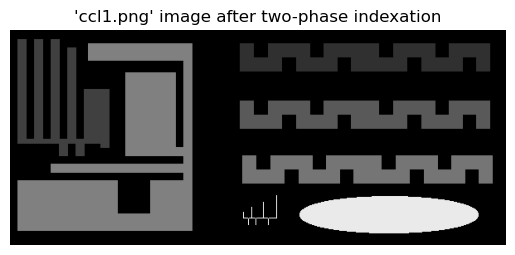

In [8]:
# wczytajmy z powrotem oryginalny obraz
ccl1 = cv2.imread('ccl1.png', cv2.IMREAD_GRAYSCALE)

# wykonanie dwufazowego algorytmu indeksacji
indexation(ccl1)

# wyświetlmy obraz po wykonaniu algorytmu
plt.imshow(ccl1, 'gray')
plt.title("'ccl1.png' image after two-phase indexation")
plt.axis('off')

## Indeksacja wbudowana w OpenCV

W OpenCV dostępna jest funkcja `connectedComponents`, która pozwala wykonać indeksację.
Proszę sprawdzić jej działanie na używanym wcześniej obrazie.

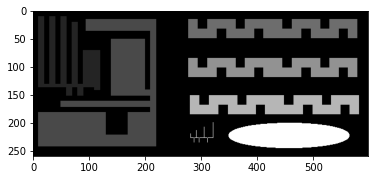

In [ ]:
# Indeksacja wbudowana w OpenCV

(-0.5, 597.5, 258.5, -0.5)

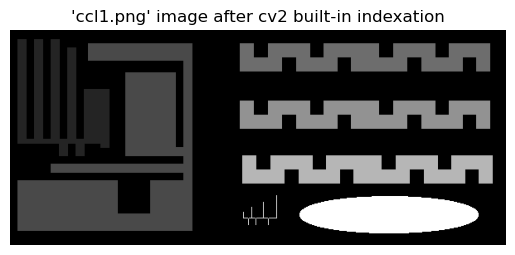

In [9]:
# wczytajmy z powrotem oryginalny obraz
ccl1 = cv2.imread('ccl1.png', cv2.IMREAD_GRAYSCALE)

#indeksacja wbudowana w OpenCV
_, labels = cv2.connectedComponents(ccl1)

# wyświetlmy obraz po indeksacji
plt.imshow(labels, 'gray')
plt.title("'ccl1.png' image after cv2 built-in indexation")
plt.axis('off')

## Rozpoznawanie obiektów z wykorzystaniem współczynników kształtu

Współczynniki kształtu są pewnymi parametrami liczbowymi opisującymi kształt obiektu.
Pozwala to na użycie ich do automatycznego rozpoznawania obiektów.
Teoretycznie współczynniki kształtu (dobre) powinny być niezależne od zmiany położenia obiektu, jego orientacji i wielkości.
W praktyce okazuje się jednak, że wartości współczynników zmieniają się w pewnym zakresie nawet dla obiektów należących do tych samych klas (te same kształty - np. obracany kwadrat).
Wynika z tego konieczność uwzględnienia pewnej tolerancji wartości współczynników kształtu wykorzystywanych w praktycznych zastosowaniach analizy i rozpoznawania obrazu.

## Implementacja dla obrazu sztucznego

- Wczytaj obraz _shapes.png_.
  Wyświetl go.
  Pierwszym etapem zadania będzie wybranie współczynników kształtu i przedziałów ich wartości - takich, które pozwolą na wykrycie konkretnych kształtów.
  Do wyboru jest kwadrat lub krzyżyk (koło jest zbyt łatwe).

- Obok ''klasycznych'' współczynników kształtu, tj. Blaira-Blissa, Malinowskiej, Haralicka występują współczynniki będące pochodnymi momentów geometrycznych, tzw. [momenty Hu](https://en.wikipedia.org/wiki/Image_moment). Wykorzystamy je w naszym ćwiczeniu.

- Pierwszy krok to indeksacja obrazu - np. poprzez poznaną funkcję `connectedComponents`.
- Następnie w pętli, dla kolejnych obiektów, wyznaczamy współczynniki Hu.
    - po pierwsze, należy ''wybrać'' z obrazu dany obiekt, np. `I = (ccl == s) * 1` oraz `I = I.astype('uint8')`,
    - po drugie, obliczyć momenty geometryczne - `cv2.moments(I)`,
    - po trzecie, na podstawie momentów, obliczyć momenty Hu - `cv2.HuMoments(moments)`.
- Mając wyznaczone współczynniki, musimy je przeanalizować. W tym celu dobrze je jakoś wyświetlić w postaci macierzy - proszę to rozwiązać samodzielnie.

- Na podstawie analizy należy wybrać próg (jeden lub więcej) i zrealizować stosowną filtrację, tj. usunąć ''niechciane'' kształty.



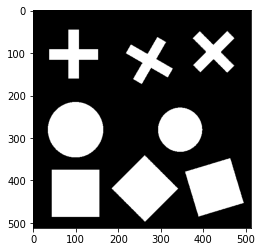

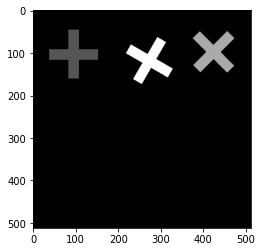

In [ ]:
# Rozpoznawanie obiektów sztucznych

In [10]:
# pomocnicza funkcja do obliczania współczynników Hu i ich wyświetlania
def hu_moments_matrix(objects, labels):
    hu_matrix = []
    
    for s in range(1, objects):
        I = ((labels == s) * 1).astype(np.uint8)
        moments = cv2.moments(I)
        hu_moments = cv2.HuMoments(moments)
        hu_matrix.append(list(hu_moments))
    
    # wyświetlmy macierz momentów
    for row in hu_matrix:
        for element in row:
            print(f"{element[0]:12.4e}", end=' ')
    
        print()

    return hu_matrix

(-0.5, 511.5, 511.5, -0.5)

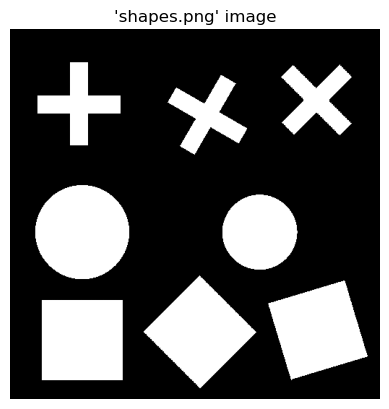

In [11]:
# wczytanie obrazu
shapes = cv2.imread('shapes.png', cv2.IMREAD_GRAYSCALE)

# wyświetlmy obraz
plt.imshow(shapes, 'gray')
plt.title("'shapes.png' image")
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

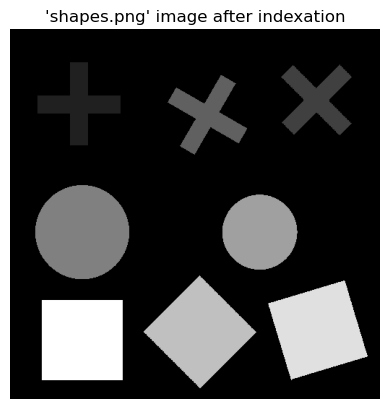

In [12]:
# indeksacja obrazu
objects, labels = cv2.connectedComponents(shapes)

# wyświetlmy obraz po indeksacji
plt.imshow(labels, 'gray')
plt.title("'shapes.png' image after indexation")
plt.axis('off')

In [13]:
hu_matrix = hu_moments_matrix(objects, labels)

  2.5020e-01   2.3093e-09   2.3196e-05   1.4733e-06   8.6125e-12   7.0798e-11   1.1825e-24 
  2.5795e-01   1.0898e-06   2.8622e-05   1.7762e-06   1.2631e-11  -1.8540e-09   9.2900e-13 
  2.5706e-01   1.5026e-07   2.7393e-05   1.7373e-06   1.1984e-11  -6.7338e-10  -1.4905e-13 
  1.5915e-01   3.1629e-08   8.2206e-10   7.3634e-14  -3.4935e-25   1.1576e-17   4.5405e-25 
  1.5916e-01   1.3061e-07   9.5076e-09   3.3468e-13  -1.3372e-24  -5.8288e-17   1.8832e-23 
  1.6669e-01   2.3738e-06   6.3560e-10   5.3126e-11   4.0156e-21  -5.9978e-14  -8.8981e-21 
  1.6672e-01   1.5005e-06   2.8508e-09   1.8684e-10   1.0881e-19  -6.2418e-15   8.2189e-20 
  1.6666e-01   2.2344e-06   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00 



---

Po analizie wartości w macierzy, zauważyłem, że w szczególności wartości pierwszego _momentu Hu_ (pierwsza kolumna macierzy) obiektów pozwalają wyodrębnić różne ich kategorie.
Pierwsze 3 wiersze odpowiadają "krzyżykom", kolejne 2 kołom, a ostatnie 3 - kwadratom.

Podjąłem decyzję, że wyodrębnię **kwadraty**. 
W tym celu przyjmuję zakres wartości dla **pierwszego** momentu:
- dolna granica: 0.1665
- górna granica: 0.1669

---


(-0.5, 511.5, 511.5, -0.5)

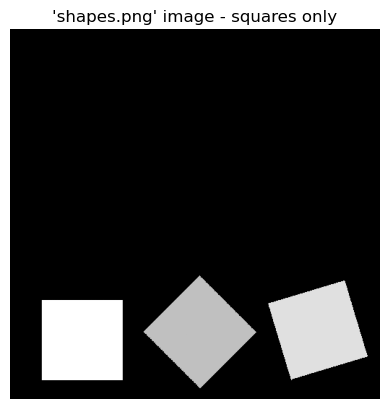

In [14]:
# progi wartości
TL = 0.1665
TH = 0.1669

squares = np.zeros_like(labels)

# wyodrębnienie kwadratów
for s in range(1, objects):
    I = labels == s
    hu_moment = hu_matrix[s-1][0][0]

    if TL <= hu_moment <= TH:
        squares[I] = s

# wyświetlmy obraz po usunięciu pozostałych kształtów
plt.imshow(squares, 'gray')
plt.title("'shapes.png' image - squares only")
plt.axis('off')

## Implementacja dla obrazu rzeczywistego

- Podobne ćwiczenie należy zrealizować dla obrazu rzeczywistego: _shapesReal.png_.
- Uwaga - wykorzystując poznane metody przetwarzania obrazu, doprowadź obraz do postaci binarnej (usuń ewentualne zakłócenia itp.).
- Dodatkowe uwagi:
    - należy z obrazu wyeliminować małe grupki pikseli - tak aby nie zostały poindeksowane,
    - obiektów powinno być 13,
    - może się okazać, że zajdzie potrzeba modyfikacji warunków na współczynniki albo wręcz wprowadzenia dodatkowych współczynników,
    - warto zaznaczyć, że opisane podejście, tj. ''ręczne'' wyznaczanie przedziałów parametrów stosuje się tylko do bardzo prostych problemów. W rzeczywistych aplikacjach rozpoznawania obrazu stosuje się uczenie maszynowe i klasyfikatory typu sztuczne sieci neuronowe, algorytm kNN czy SVM.

- Sposób postępowania jest zasadniczo bardzo podobny do tego użytego wcześniej,
przy czym ponieważ obiektów jest więcej, warto je sobie ''opisać'' - ułatwia to analizę:
    - użyjemy funkcji `connectedComponentsWithStats` - pozwala ona wyliczyć statystyki (pole, prostokąt otaczający oraz centroid). Szczegóły użycia proszę sprawdzić w dokumentacji,
    - wykonujemy kopię obrazu poindeksowanego (`ccl_vis = ccl.copy()`),
    - w pętli po obiektach wypisujemy numery:
      `cv2.putText(ccl_vis, str(label_num), (int(centroids[s, 0]), int(centroids[s, 1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (20, 0, 0), 2)`.
      Argumenty to odpowiednio: obraz, tekst, jego położenie, czcionka, rozmiar, kolor, grubość).
      Zwróćmy uwagę na kolor, tu dobrze jest dać wartość nieco większą niż maksymalna etykieta - inaczej wystąpi problem z czytelnością wizualizacji.

- Przeprowadzamy podobną analizę jak wcześniej i dobieramy odpowiednie warunki/progi.
- W efekcie powinniśmy uzyskać obraz z krzyżykami, kwadratami lub kółkami.

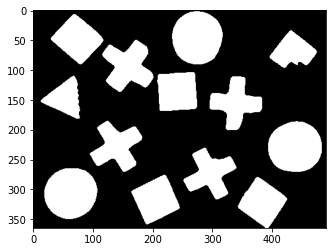

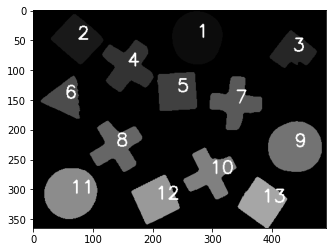

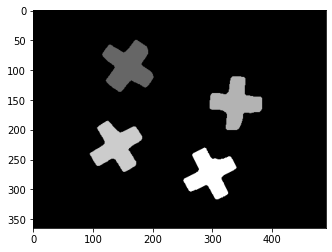

In [ ]:
# Rozpoznawanie obiektów rzeczywistych

(-0.5, 490.5, 364.5, -0.5)

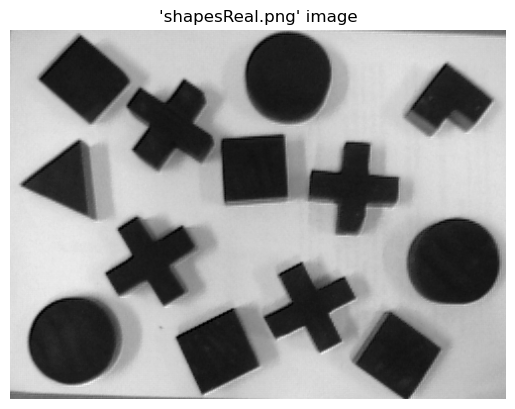

In [15]:
# wczytanie obrazu
shapesReal = cv2.imread('shapesReal.png', cv2.IMREAD_GRAYSCALE)

# wyświetlmy obraz
plt.imshow(shapesReal, 'gray')
plt.title("'shapesReal.png' image")
plt.axis('off')

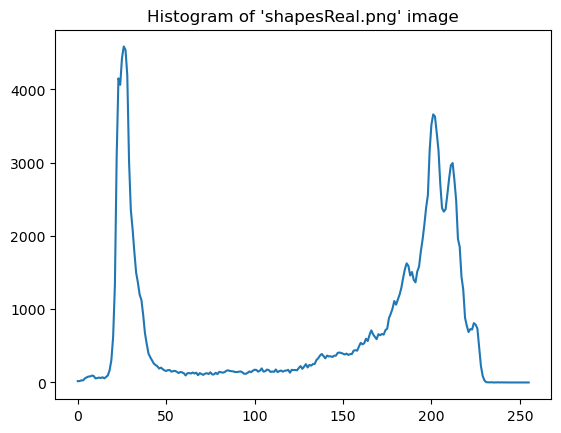

In [16]:
# badanie histogramu obrazu
shapesReal_hist = cv2.calcHist([shapesReal], [0], None, [256], [0, 256])

# wyświetlmy histogram
plt.plot(shapesReal_hist)
plt.title("Histogram of 'shapesReal.png' image")
plt.show()

Analizując histogram, przyjmuję próg binaryzacji 65.

(-0.5, 490.5, 364.5, -0.5)

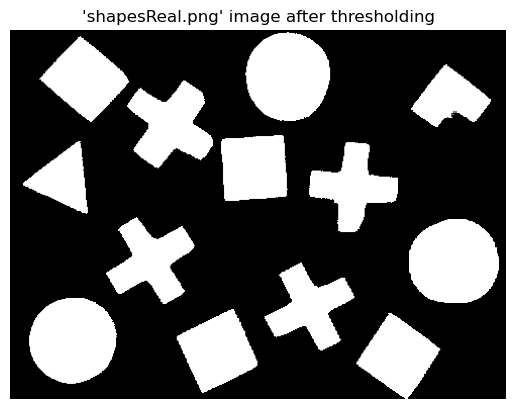

In [17]:
# binaryzacja
_, shapesReal_bin = cv2.threshold(shapesReal, 65, 1, cv2.THRESH_BINARY_INV)

# wyświetlmy obraz po binaryzacji
plt.imshow(shapesReal_bin, 'gray')
plt.title("'shapesReal.png' image after thresholding")
plt.axis('off')

Spróbuję jeszcze nieco "obciąć" wystający element obiektu w prawym górnym rogu obrazka. Użyję w tym celu operacji **otwarcia morfologicznego**.

(-0.5, 490.5, 364.5, -0.5)

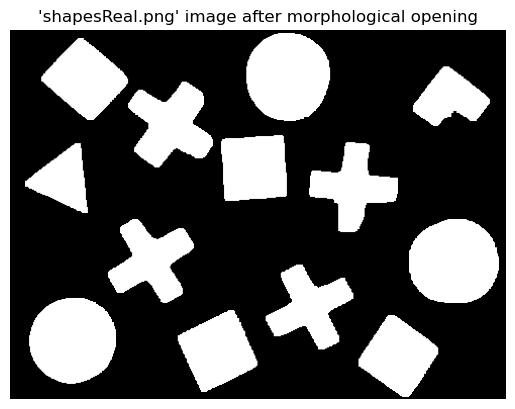

In [18]:
# otwarcie morfologiczne
shapesReal_bin_open = cv2.morphologyEx(
    src=shapesReal_bin, 
    op=cv2.MORPH_OPEN, 
    kernel=cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
)

# wyświetlmy obraz po otwarciu
plt.imshow(shapesReal_bin_open, 'gray')
plt.title("'shapesReal.png' image after morphological opening")
plt.axis('off')

Uznaję, że tak przetworzony obraz nadaje się już do głównego etapu zadania.

(-0.5, 490.5, 364.5, -0.5)

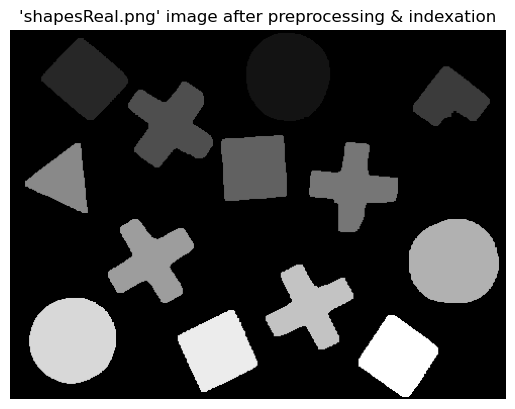

In [19]:
# indeksacja obrazu ze statystykami
objects, labels, _, centroids = cv2.connectedComponentsWithStats(shapesReal_bin_open)

# wyświetlmy obraz po indeksacji
plt.imshow(labels, 'gray')
plt.title("'shapesReal.png' image after preprocessing & indexation")
plt.axis('off')

(-0.5, 490.5, 364.5, -0.5)

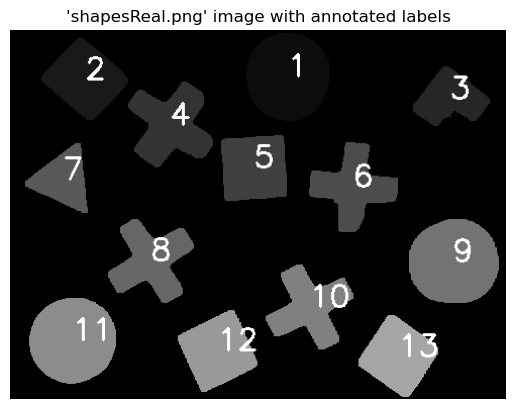

In [20]:
# kopia obrazu
labels_copy = labels.copy()

for s in range(1, objects):
    cv2.putText(
        img=labels_copy,
        text=str(s), 
        org=(int(centroids[s, 0]), int(centroids[s, 1])), 
        fontFace=cv2.FONT_HERSHEY_SIMPLEX, 
        fontScale=1, 
        color=(20, 0, 0), 
        thickness=2
    )

# wyświetlmy obraz po dodaniu podpisów
plt.imshow(labels_copy, 'gray')
plt.title("'shapesReal.png' image with annotated labels")
plt.axis('off')

In [21]:
hu_matrix = hu_moments_matrix(objects, labels)

  1.5945e-01   6.5400e-05   4.5262e-06   2.6254e-09   1.5644e-16   1.6920e-11   2.3965e-16 
  1.6654e-01   5.2166e-04   4.8050e-07   5.3192e-08   8.5018e-15   4.5751e-10   1.8906e-16 
  1.8657e-01   3.6899e-03   1.4400e-03   3.6734e-05  -6.5654e-09  -1.8939e-06  -5.3171e-09 
  1.9240e-01   9.6693e-06   3.8660e-06   1.7706e-06  -7.4191e-14   3.5396e-09   4.6319e-12 
  1.6642e-01   9.3476e-06   8.7522e-07   3.5478e-08  -2.0735e-15   2.1329e-11   5.8977e-15 
  2.0188e-01   1.3312e-05   1.7660e-06   7.5792e-07  -7.8782e-13   4.7201e-10  -3.8496e-13 
  1.8980e-01   6.7832e-05   4.0737e-03   2.6799e-06  -1.8231e-10  -1.7174e-08   2.1252e-10 
  2.0517e-01   8.2717e-05   8.0345e-06   5.3041e-07  -4.6289e-13   4.6140e-09   9.9230e-13 
  1.5966e-01   1.1605e-04   5.7857e-06   7.1880e-09  -1.9914e-16   5.4975e-12   1.4523e-15 
  2.0676e-01   2.4469e-05   1.0330e-05   7.5232e-07  -4.9394e-13   6.3426e-10   2.0383e-12 
  1.5926e-01   2.6107e-05   4.8777e-07   1.7755e-10   1.4787e-18   9.0317e-13  -


---

Po analizie wartości w macierzy, zauważyłem, że w tym przypadku również wartości pierwszego _momentu Hu_ (pierwsza kolumna macierzy) pozwalają wyodrębnić różne kategorie obiektów, bowiem (mimo pewnej rozbieżności) zarysowują się rozłączne przedziały dla różnych rodzajów obiektów.

Podjąłem decyzję, że tym razem wyodrębnię **krzyżyki**. 
W tym celu przyjmuję zakres wartości dla **pierwszego** momentu:
- dolna granica: 0.1900
- górna granica: 0.2080

---


(-0.5, 490.5, 364.5, -0.5)

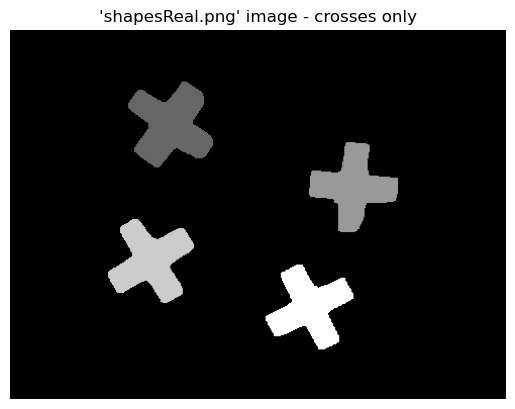

In [22]:
# progi wartości
TL = 0.1900
TH = 0.2080

crosses = np.zeros_like(labels)

# wyodrębnienie krzyżyków
for s in range(1, objects):
    I = labels == s
    hu_moment = hu_matrix[s-1][0][0]

    if TL <= hu_moment <= TH:
        crosses[I] = s

# wyświetlmy obraz po usunięciu pozostałych kształtów
plt.imshow(crosses, 'gray')
plt.title("'shapesReal.png' image - crosses only")
plt.axis('off')